####  Detect eye blinks and turn them into Annotations:

In [1]:
import os.path as op
import numpy as np

import mne

In [2]:
# Load the data
data_path = mne.datasets.sample.data_path()
fname = op.join(data_path, 'MEG', 'sample', 'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(fname)

Opening raw data file /home/reallocing/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0


In [3]:
# find blinks
annotated_blink_raw = raw.copy()
eog_events = mne.preprocessing.find_eog_events(raw)

## The first column contains the event time in samples and 
## the third column contains the event id.
## For output = ‘onset’ or ‘step’, 
## the second column contains the value of the stim channel immediately before the event/step.
## For output = ‘offset’, the second column contains the value of the stim channel after the event offset.
eog_events

EOG channel index for this subject is: [375]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 2 - 45 Hz
Filter length of 8192 samples (13.639 sec) selected
Setting up band-pass filter from 1 - 10 Hz
Filter length of 8192 samples (13.639 sec) selected
Now detecting blinks and generating corresponding events
Number of EOG events detected : 46


array([[ 26101,      0,    998],
       [ 27186,      0,    998],
       [ 28003,      0,    998],
       [ 34483,      0,    998],
       [ 44125,      0,    998],
       [ 45394,      0,    998],
       [ 52153,      0,    998],
       [ 60101,      0,    998],
       [ 60548,      0,    998],
       [ 61318,      0,    998],
       [ 61884,      0,    998],
       [ 63079,      0,    998],
       [ 68564,      0,    998],
       [ 86228,      0,    998],
       [ 86940,      0,    998],
       [ 87246,      0,    998],
       [ 93869,      0,    998],
       [ 99004,      0,    998],
       [100345,      0,    998],
       [102688,      0,    998],
       [104184,      0,    998],
       [106000,      0,    998],
       [106518,      0,    998],
       [108455,      0,    998],
       [109866,      0,    998],
       [110895,      0,    998],
       [111426,      0,    998],
       [112573,      0,    998],
       [114295,      0,    998],
       [118565,      0,    998],
       [12

In [5]:
n_blinks = len(eog_events)
n_blinks

46

In [15]:
# Turn blink events into Annotations of 0.5 seconds duration,
# each centered on the blink event:
# raw.info['sfreq']:采样率
onset = eog_events[:,0]/raw.info['sfreq'] - 0.25
onset

array([  43.20712382,   45.01360554,   46.37387795,   57.16281946,
         73.21636484,   75.32919922,   86.5826646 ,   99.81576755,
        100.56000472,  101.842024  ,  102.78439143,  104.77401876,
        113.90632496,  143.31618034,  144.50163193,  145.01110973,
        156.03814053,  164.5877107 ,  166.8204222 ,  170.72142374,
        173.21220406,  176.23577162,  177.09822096,  180.32324869,
        182.67250741,  184.38575136,  185.26984518,  187.17955442,
        190.04661573,  197.1559954 ,  212.20889975,  217.44353434,
        218.21274591,  228.80022725,  230.48516688,  231.39922998,
        233.76347333,  235.10543118,  254.63208335,  261.05882937,
        261.60493629,  262.54397379,  310.50980959,  311.04592674,
        311.80681351,  313.34690161])

In [17]:
duration = np.repeat(0.5,n_blinks)
duration

array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5])

In [19]:
description = ['bad blink'] * n_blinks

In [21]:
annot = mne.Annotations(onset,duration,description,orig_time=raw.info['meas_date'])
annot

<Annotations  |  46 segments : bad (46), orig_time : 2002-12-03 19:01:10.720100>

In [22]:
annotated_blink_raw.set_annotations(annot)

<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 376 x 166800 (277.7 sec), ~3.8 MB, data not loaded>

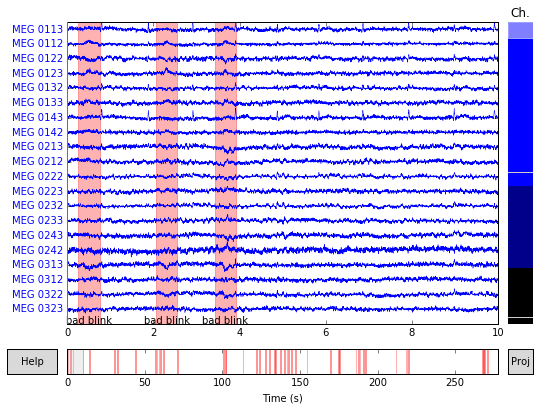

In [24]:
annotated_blink_raw.plot();

### Ref
- https://martinos.org/mne/stable/auto_tutorials/plot_object_annotations.html#sphx-glr-auto-tutorials-plot-object-annotations-py